<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

Support Vector Regression (SVR) indeed uses a concept called the "Epsilon-Insensitive Tube". This is a key part of how SVR works.

In simple terms, SVR tries to find a function that approximates the relationship between your features and the target variable. It does this by fitting a line (or a hyperplane in higher dimensions) to the data.

The epsilon-insensitive tube is used to define the area where errors are considered acceptable. Any data point that falls within this tube is not counted as an error, even if it does not lie exactly on the predicted line. The width of this tube is defined by the hyperparameter epsilon (ε). The larger the epsilon, the larger the tube, and more errors are considered acceptable.

The SVR algorithm then tries to make this tube as large as possible (to minimize the error) while keeping it flat (to prevent overfitting). The data points that lie outside this tube are called support vectors, and they are used to define the boundaries of the tube.

So, the epsilon-insensitive tube is a key part of the SVR approach, and it is one of the reasons why SVR can be quite robust to outliers.


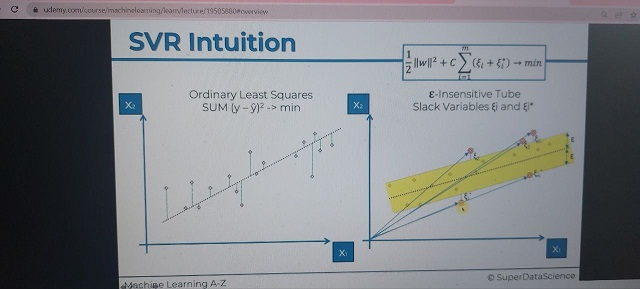

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part2-Regression/Section 7 _ Support vector Regression(SVR)/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y=y.reshape(len(y),1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [8]:
#show datas between 3,-3
from sklearn.preprocessing import  StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf') #rbf=> gaussian radial basis function
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [16]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)) #regresser.predict expects 2d array #inverse transfrom =>return back y to the main format(without feature scaling) #reshape(-1,1)=> convert toeachshape based on arraye that you gave me, forexample(8,1)

array([[170370.0204065]])

## Visualising the SVR results

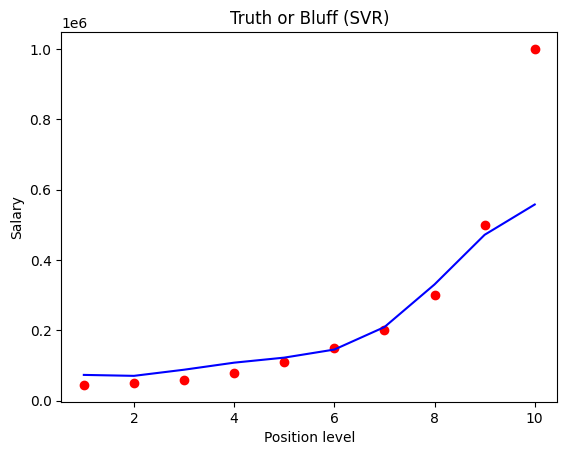

In [19]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1))  , color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

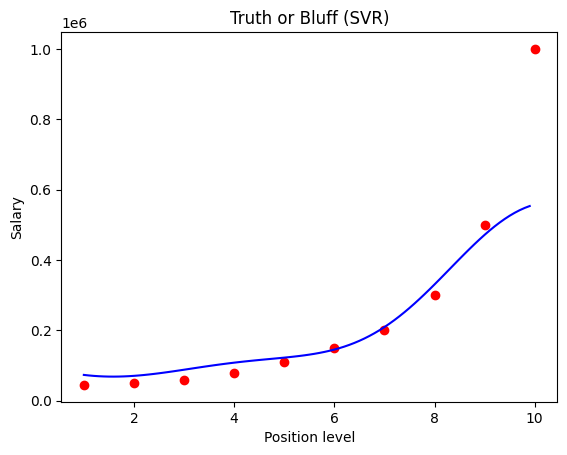

In [20]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1) #inverse_transform=>back to original scale
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The line of code you're asking about is used to create a range of evenly spaced values between the minimum and maximum values of the rescaled feature `X`.

Here's a breakdown of what each part does:

- `np.arange(start, stop, step)`: This is a NumPy function that generates a sequence of numbers from `start` to `stop`, incrementing by `step`.

- `min(sc_X.inverse_transform(X))` and `max(sc_X.inverse_transform(X))`: These expressions are finding the minimum and maximum values of the feature `X`, after it has been inverse transformed to its original scale. The `inverse_transform()` method is used to reverse the scaling applied by the standard scaler `sc_X`.

- The `0.1` is the step size. It's saying "generate a sequence of numbers, starting from the minimum value of `X` and ending at the maximum value of `X`, and increment by 0.1 each time."

The purpose of creating this `X_grid` array is usually to generate a set of points to use for plotting a graph. By creating an array of points that span the full range of `X` values, we can plot a curve that shows how the predicted `y` values change across the full range of `X` values. This can help to visualize the model's predictions across the entire range of the data.